<a href="https://colab.research.google.com/github/arianab68/Diabetes_Analysis/blob/master/DIABETES_DATA_SET_MODEL_CREATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Information:**

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks.

It includes over 50 features representing patient and hospital outcomes. 

Information was extracted from the database for encounters that satisfied the following criteria.

It is an inpatient encounter (a hospital admission).

It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

The length of stay was at least 1 day and at most 14 days.

Laboratory tests were performed during the encounter.

Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


**What are we trying to accomplish ?**

Our goal is to make a classification model that can be used to predict something within the dataset.

With this dataset we choose to predict whether a patient is likely to be readmitted in the hospital within 30 days.

The features we used to train our Machine Learning models, consisted of 10 columns which indicated the following: whether our patients was over 70 years old, whether our patients already spent 4 days or more in the hopsital, if our patients already had 2 or more labs done, if our patients is taking 15 or more medications, if our patients had one or more ER visits , if our patients had outpatient circumstances, diagnosed of 6 or more times, whether our patients is taking diabetes medication and whether our patients had experiences any changes from their hospital visits.

We chose these 10 columns to feature in our models because we believed that they related directly to an increased possibility that these patients will be readmitted within 30 days of their last hospital visit.

Using the KNN and Random Forest model we were able to analyze and predict how accurate our analyses were.


Collaborated with: MJ and Tashi

Importing Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns # Set default graph style, size
sns.set()
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize': (12, 10)})
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv'
)

Data Wrangling and Cleaning for Machina Learning Models


In [3]:
# Replace all values of ?, None, Unknown/Invalid with NaN

df = df.replace(
    ['?', 'None', 'Unknown/Invalid'], 
    np.NaN
)

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Dropping the columns that we will not feature in our ML models.
df.drop([
         'encounter_id',
         'patient_nbr',
         'weight',
         'admission_type_id',
         'discharge_disposition_id',
         'admission_source_id',
         'payer_code',
         'medical_specialty',
         'diag_1',
         'diag_2',
         'diag_3',
         'metformin',
         'repaglinide',
         'nateglinide',
         'chlorpropamide',
         'glimepiride',
         'acetohexamide',
         'glipizide',
         'glyburide',                    
         'tolbutamide',                  
         'pioglitazone',                 
         'rosiglitazone',               
         'acarbose',                    
         'miglitol',                     
         'troglitazone',                 
         'tolazamide',                  
         'examide',                     
         'citoglipton',                 
         'insulin',                     
         'glyburide-metformin',          
         'glipizide-metformin',          
         'glimepiride-pioglitazone',     
         'metformin-rosiglitazone',     
         'metformin-pioglitazone'],
        axis = 1, inplace = True)

df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,1,NaN,NaN,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,9,NaN,NaN,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,6,NaN,NaN,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,7,NaN,NaN,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,5,NaN,NaN,Ch,Yes,NO


In [5]:
# Rename age column 'over_70'

df.rename(columns = {'age': 'over_70'}, inplace = True)

In [6]:
# Turn all values binary

df['over_70'].replace({
    '[0-10)':0, 
    '[10-20)':0, 
    '[20-30)':0,
    '[30-40)':0,
    '[40-50)':0,
    '[50-60)':0,
    '[60-70)':0,
    '[70-80)':1,
    '[80-90)':1,
    '[90-100)':1
    }, inplace = True)

In [7]:
df.head()

,race,gender,over_70,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,Caucasian,Female,0,1,41,0,1,0,0,0,1,NaN,NaN,No,No,NO
1,Caucasian,Female,0,3,59,0,18,0,0,0,9,NaN,NaN,Ch,Yes,>30
2,AfricanAmerican,Female,0,2,11,5,13,2,0,1,6,NaN,NaN,No,Yes,NO
3,Caucasian,Male,0,2,44,1,16,0,0,0,7,NaN,NaN,Ch,Yes,NO
4,Caucasian,Male,0,1,51,0,8,0,0,0,5,NaN,NaN,Ch,Yes,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   race                99493 non-null   object
 1   gender              101763 non-null  object
 2   over_70             101766 non-null  int64 
 3   time_in_hospital    101766 non-null  int64 
 4   num_lab_procedures  101766 non-null  int64 
 5   num_procedures      101766 non-null  int64 
 6   num_medications     101766 non-null  int64 
 7   number_outpatient   101766 non-null  int64 
 8   number_emergency    101766 non-null  int64 
 9   number_inpatient    101766 non-null  int64 
 10  number_diagnoses    101766 non-null  int64 
 11  max_glu_serum       5346 non-null    object
 12  A1Cresult           17018 non-null   object
 13  change              101766 non-null  object
 14  diabetesMed         101766 non-null  object
 15  readmitted          101766 non-null  object
dtypes:

In [9]:
#Renaming our columns to match our aimed quantified analyses.
df.rename(columns = {
    'time_in_hospital': 'days_4up',
    'num_lab_procedures': 'labs_2up',
    'num_medications': 'meds_15up',
    'number_outpatient': 'outpt_1up',
    'number_emergency': 'er_1up',
    'number_inpatient': 'inpt_1up',
    'number_diagnoses': 'diag_6up',
    'max_glu_serum': 'glu_over7',
    'A1Cresult': 'a1c_over200' # this column seems to be hardcoded into dataset
    }, inplace = True)

In [10]:
df.head()

,race,gender,over_70,days_4up,labs_2up,num_procedures,meds_15up,outpt_1up,er_1up,inpt_1up,diag_6up,glu_over7,a1c_over200,change,diabetesMed,readmitted
0,Caucasian,Female,0,1,41,0,1,0,0,0,1,NaN,NaN,No,No,NO
1,Caucasian,Female,0,3,59,0,18,0,0,0,9,NaN,NaN,Ch,Yes,>30
2,AfricanAmerican,Female,0,2,11,5,13,2,0,1,6,NaN,NaN,No,Yes,NO
3,Caucasian,Male,0,2,44,1,16,0,0,0,7,NaN,NaN,Ch,Yes,NO
4,Caucasian,Male,0,1,51,0,8,0,0,0,5,NaN,NaN,Ch,Yes,NO


Specifing Indices for values within each column that are relevant for our analyses.

In [11]:

df['glu_over7'].replace({
    '>200':1, 
    '>300':1, 
    'Norm':0
    }, inplace = True)

In [12]:
df['a1c_over200'].replace({
    '>7':1, 
    '>8':1, 
    'Norm':0
    }, inplace = True)

In [13]:
df['change'].replace({
    'No':0, 
    'Ch':1
    }, inplace = True)

In [14]:
df['diabetesMed'].replace({
    'No':0, 
    'Yes':1, 
    }, inplace = True)

In [15]:
df['readmitted'].replace({
    'NO':0, 
    '<30':1, 
    '>30':1
    }, inplace = True)

In [16]:
df.head(20)

,race,gender,over_70,days_4up,labs_2up,num_procedures,meds_15up,outpt_1up,er_1up,inpt_1up,diag_6up,glu_over7,a1c_over200,change,diabetesMed,readmitted
0,Caucasian,Female,0,1,41,0,1,0,0,0,1,NaN,NaN,0,0,0
1,Caucasian,Female,0,3,59,0,18,0,0,0,9,NaN,NaN,1,1,1
2,AfricanAmerican,Female,0,2,11,5,13,2,0,1,6,NaN,NaN,0,1,0
3,Caucasian,Male,0,2,44,1,16,0,0,0,7,NaN,NaN,1,1,0
4,Caucasian,Male,0,1,51,0,8,0,0,0,5,NaN,NaN,1,1,0
5,Caucasian,Male,0,3,31,6,16,0,0,0,9,NaN,NaN,0,1,1
6,Caucasian,Male,0,4,70,1,21,0,0,0,7,NaN,NaN,1,1,0
7,Caucasian,Male,1,5,73,0,12,0,0,0,8,NaN,NaN,0,1,1
8,Caucasian,Female,1,13,68,2,28,0,0,0,8,NaN,NaN,1,1,0
9,Caucasian,Female,1,12,33,3,18,0,0,0,8,NaN,NaN,1,1,0


Replacing other values within our columns using a for loop via indexing.

In [17]:
df['days_4up'] = np.where(df['days_4up'] > 3, 1, 0)
df['days_4up']

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    1
101763    0
101764    1
101765    1
Name: days_4up, Length: 101766, dtype: int64

In [18]:
df['labs_2up'] = np.where(df['labs_2up'] > 1, 1, 0)
df['labs_2up']

0         1
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: labs_2up, Length: 101766, dtype: int64

In [19]:
df['meds_15up'] = np.where(df['meds_15up'] > 2, 1, 0)
df['meds_15up']

0         0
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: meds_15up, Length: 101766, dtype: int64

In [20]:
df['outpt_1up'] = np.where(df['outpt_1up'] >= 1, 1, 0)
df['outpt_1up']

0         0
1         0
2         1
3         0
4         0
         ..
101761    0
101762    0
101763    1
101764    0
101765    0
Name: outpt_1up, Length: 101766, dtype: int64

In [21]:
df['er_1up'] = np.where(df['er_1up'] >= 1, 1, 0)
df['er_1up']

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: er_1up, Length: 101766, dtype: int64

In [22]:
df['inpt_1up'] = np.where(df['inpt_1up'] >= 1, 1, 0)
df['inpt_1up']

0         0
1         0
2         1
3         0
4         0
         ..
101761    0
101762    1
101763    0
101764    1
101765    0
Name: inpt_1up, Length: 101766, dtype: int64

In [23]:
df['diag_6up'] = np.where(df['diag_6up'] >= 6, 1, 0)
df['diag_6up']

0         0
1         1
2         1
3         1
4         0
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: diag_6up, Length: 101766, dtype: int64

In [24]:
df.head(10)

,race,gender,over_70,days_4up,labs_2up,num_procedures,meds_15up,outpt_1up,er_1up,inpt_1up,diag_6up,glu_over7,a1c_over200,change,diabetesMed,readmitted
0,Caucasian,Female,0,0,1,0,0,0,0,0,0,NaN,NaN,0,0,0
1,Caucasian,Female,0,0,1,0,1,0,0,0,1,NaN,NaN,1,1,1
2,AfricanAmerican,Female,0,0,1,5,1,1,0,1,1,NaN,NaN,0,1,0
3,Caucasian,Male,0,0,1,1,1,0,0,0,1,NaN,NaN,1,1,0
4,Caucasian,Male,0,0,1,0,1,0,0,0,0,NaN,NaN,1,1,0
5,Caucasian,Male,0,0,1,6,1,0,0,0,1,NaN,NaN,0,1,1
6,Caucasian,Male,0,1,1,1,1,0,0,0,1,NaN,NaN,1,1,0
7,Caucasian,Male,1,1,1,0,1,0,0,0,1,NaN,NaN,0,1,1
8,Caucasian,Female,1,1,1,2,1,0,0,0,1,NaN,NaN,1,1,0
9,Caucasian,Female,1,1,1,3,1,0,0,0,1,NaN,NaN,1,1,0


#Machine Learning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   race            99493 non-null   object 
 1   gender          101763 non-null  object 
 2   over_70         101766 non-null  int64  
 3   days_4up        101766 non-null  int64  
 4   labs_2up        101766 non-null  int64  
 5   num_procedures  101766 non-null  int64  
 6   meds_15up       101766 non-null  int64  
 7   outpt_1up       101766 non-null  int64  
 8   er_1up          101766 non-null  int64  
 9   inpt_1up        101766 non-null  int64  
 10  diag_6up        101766 non-null  int64  
 11  glu_over7       5346 non-null    float64
 12  a1c_over200     17018 non-null   float64
 13  change          101766 non-null  int64  
 14  diabetesMed     101766 non-null  int64  
 15  readmitted      101766 non-null  int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 12.4+ 

###Splitting our data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df[['over_70',
                'days_4up',
                'labs_2up',
                'meds_15up',
                'outpt_1up',
                'er_1up',
                'inpt_1up',
                'diag_6up',
                'change',
                'diabetesMed'
                ]]
y = df['readmitted']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

###Random Forests Model


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test, rfc_pred))

[[11898  4568]
 [ 7018  7046]]


In [33]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67     16466
           1       0.61      0.50      0.55     14064

    accuracy                           0.62     30530
   macro avg       0.62      0.61      0.61     30530
weighted avg       0.62      0.62      0.62     30530



###KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [35]:
knn_pred = knn.predict(X_test)

In [36]:
print(confusion_matrix(y_test, knn_pred))

[[11394  5072]
 [ 6717  7347]]


In [37]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66     16466
           1       0.59      0.52      0.55     14064

    accuracy                           0.61     30530
   macro avg       0.61      0.61      0.61     30530
weighted avg       0.61      0.61      0.61     30530



In [38]:
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

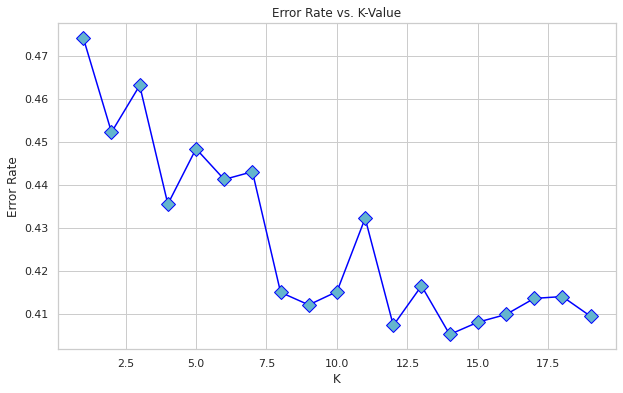

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))
plt.plot(range(1, 20), error_rate, color = 'blue', linestyle = '-', marker = 'D', markerfacecolor = 'c', markersize = 10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Conclusion:**

Based on our KNN and Random Forest prediction models our prediction score was fairly low, being under 70%. Even after attempting to concise our dataset to be more specific, we could not seem to get a precision score above the amount 0.61-0.63. Nonetheless, our analysis was still efficient despite an under average prediction score. 